In [2]:
#EDA : try to analyze the data and visualize
#preprocessing
# 1. missing value treatment {numerical col = if outlier== median , no outlier == mean}
# 2. outlier removal treatment {IQR , Zscore methods}
# 3. to see correlation , skewness , kurtosis
# 4. numerical=>> sclaing > type > (minmax scaler , standardization)
# 5. categorical=>> Encoding > type (Label encoder, One hot encoder)


In [3]:
#import lib
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
pwd  # use to check current working directory

'C:\\Users\\gauri\\ML python P308'

In [5]:
# check data file is available
print(os.path.isfile("Employee_Data.xls"))

True


In [6]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [7]:

df=pd.read_excel("Employee_Data.xls")

In [8]:
df.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [9]:
mydata=df.copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [11]:
mydata.describe

<bound method NDFrame.describe of     Employee Id First Name Last Name           Department   Age  Experience  \
0             1        Joy      Bass  Sales and Marketing  28.0         3.0   
1             2     Sheila     Garza  Sales and Marketing  22.0         1.0   
2             3       John    Bryant   Customer Relations  22.0         1.0   
3             4  Christian    Farley   Customer Relations  22.0         1.0   
4             5   Colorado     Bowen           Accounting  27.0         0.0   
..          ...        ...       ...                  ...   ...         ...   
95           96     Tyrone    Barber  Sales and Marketing  47.0        22.0   
96           97    Urielle   Herrera  Sales and Marketing  46.0        20.0   
97           98    Brendan     Solis   Customer Relations  44.0        18.0   
98           99     Holmes    Nelson   Customer Relations  47.0        22.0   
99          100       Avye  Davidson           Accounting  44.0        21.0   

    Salary  
0   

In [12]:
lst=['Department','Age','Experience','Salary']
for i in lst:
    print(i,mydata[i].unique())
    print('********')

Department ['Sales and Marketing' 'Customer Relations' 'Accounting' nan]
********
Age [28. 22. 27. 26. 24. 29. 30. 25. 33. 36. 35. 40. 39. nan 38. 41. 44. 50.
 47. 43. 48. 46. 42. 49. 45.]
********
Experience [ 3.  1.  0.  5.  6.  2. nan 13.  7. 10. 12. 14. 15.  9. 11.  8. 25. 17.
 21. 19. 22. 16. 18. 23. 24. 20.]
********
Salary [32889 15944 40343 19018 24795 15387 34117 16099 42105 11891 34687 23549
 29110 33435 11830 44065 13266 16631 29886 30464 14943 18632 38183 43093
 26573 51228 57902 54233 70010 74683 53867 60117 72055 50013 50118 72318
 53828 58362 63391 62983 65939 51715 54250 50462 64418 60164 66528 57278
 71607 61222 68388 94704 89493 94310 81615 84306 77452 76904 90798 86261
 78332 84881 76528 83524 89258 75431 91870 76708 95222 90802 86277 77330
 85286 90930 88833 95908 92365 93854 85336 79898 84708 88381 93206 91795
 96432 83300 94778 82283 97056 87654 89875 98180 84185 79509 97990 79077
 81187 83847 89158 91645]
********


In [13]:
# find null value
mydata.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [14]:
# treating missing value [tip: dont drop missing value u can do for null]
# find mode to fill missing values
mydata['Department'].value_counts()


Department
Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: count, dtype: int64

In [15]:
# fill mode values in null and miss value
mydata['Department']=mydata['Department'].fillna('Sales and Marketing')

In [16]:
mydata['Department'].isnull().sum()

0

<Axes: ylabel='Experience'>

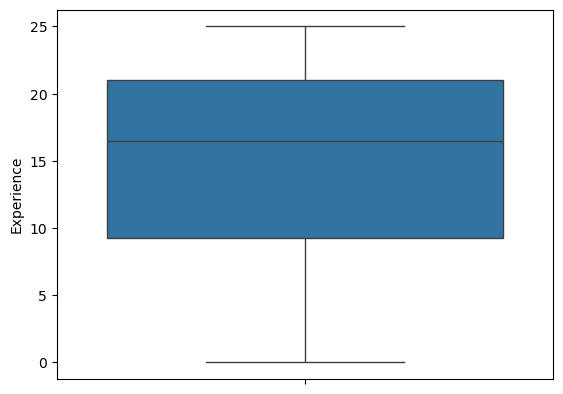

In [17]:
# to find null values in age and exper
sns.boxplot(mydata['Experience'])


<Axes: ylabel='Age'>

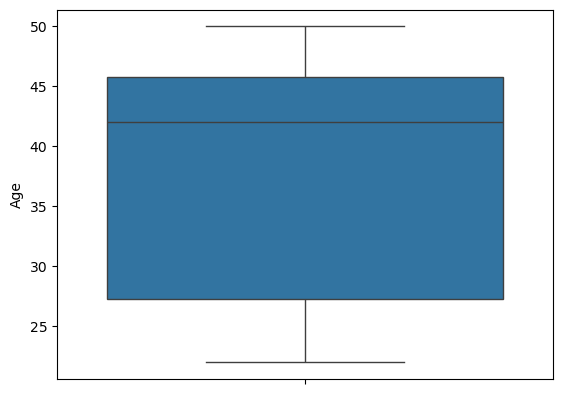

In [18]:
sns.boxplot(mydata['Age'])

In [19]:
# find mean of age and exp
age_mean=np.mean(mydata['Age'])
exp_mean=np.mean(mydata['Experience'])
print(age_mean,exp_mean)

37.97560975609756 14.766666666666667


In [20]:
mydata['Age']=mydata['Age'].fillna(age_mean)
mydata['Experience']=mydata['Experience'].fillna(exp_mean)

In [21]:
mydata.isnull().sum()

Employee Id    0
First Name     0
Last Name      0
Department     0
Age            0
Experience     0
Salary         0
dtype: int64

In [22]:
#sns.pieplot(data=mydata,kind='pie')

<Axes: xlabel='Experience', ylabel='Salary'>

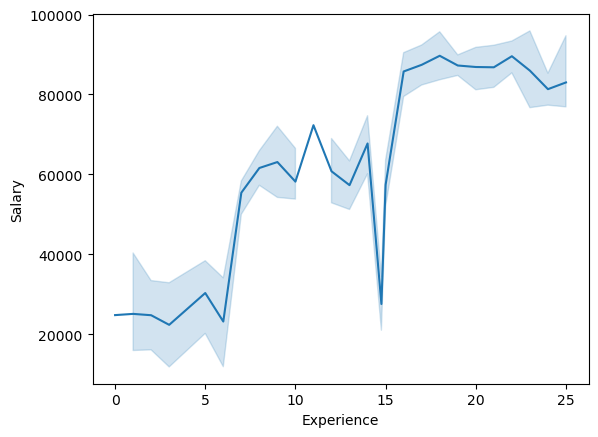

In [23]:
sns.lineplot(x = mydata["Experience"] , y = mydata["Salary"])

<Axes: xlabel='Age', ylabel='Salary'>

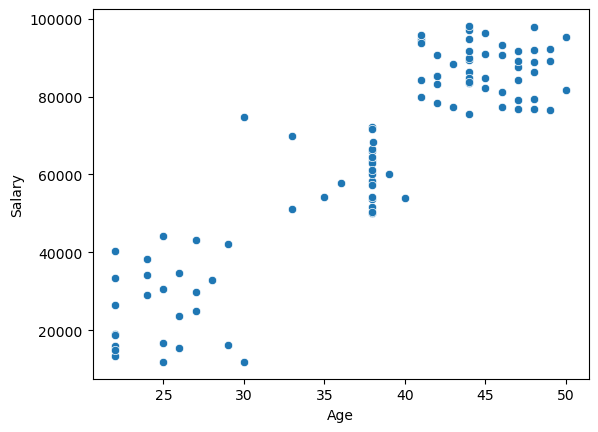

In [24]:
sns.scatterplot(x = mydata["Age"] , y = mydata["Salary"])

<Axes: xlabel='Department', ylabel='Salary'>

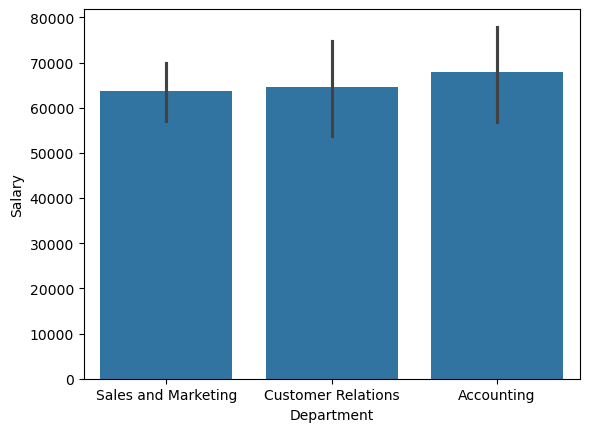

In [25]:
sns.barplot(x = mydata["Department"] , y = mydata["Salary"])

In [26]:
#label encoing for categorical col:
# department 
# 1) One hot encoder : used for only one categorical columns
# 2) label encoder : used for many column categories 


In [27]:
# One hot encoder
df_onehot=pd.get_dummies(mydata['Department'],dtype='int')
df_onehot

,Accounting,Customer Relations,Sales and Marketing
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
95,0,0,1
96,0,0,1
97,0,1,0
98,0,1,0


In [28]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mydata['Department']=le.fit_transform(mydata['Department'])

In [29]:
mydata['Department']

0     2
1     2
2     1
3     1
4     0
     ..
95    2
96    2
97    1
98    1
99    0
Name: Department, Length: 100, dtype: int32

In [30]:
onehotdata=pd.concat([mydata,df_onehot],axis=1)
onehotdata.drop('Department',axis=1,inplace=True)
onehotdata

,Employee Id,First Name,Last Name,Age,Experience,Salary,Accounting,Customer Relations,Sales and Marketing
0,1,Joy,Bass,28.0,3.0,32889,0,0,1
1,2,Sheila,Garza,22.0,1.0,15944,0,0,1
2,3,John,Bryant,22.0,1.0,40343,0,1,0
3,4,Christian,Farley,22.0,1.0,19018,0,1,0
4,5,Colorado,Bowen,27.0,0.0,24795,1,0,0
...,...,...,...,...,...,...,...,...,...
95,96,Tyrone,Barber,47.0,22.0,79077,0,0,1
96,97,Urielle,Herrera,46.0,20.0,81187,0,0,1
97,98,Brendan,Solis,44.0,18.0,83847,0,1,0
98,99,Holmes,Nelson,47.0,22.0,89158,0,1,0


In [31]:
num_data=onehotdata.iloc[:,3:]
num_data.head()

,Age,Experience,Salary,Accounting,Customer Relations,Sales and Marketing
0,28.0,3.0,32889,0,0,1
1,22.0,1.0,15944,0,0,1
2,22.0,1.0,40343,0,1,0
3,22.0,1.0,19018,0,1,0
4,27.0,0.0,24795,1,0,0


In [32]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(num_data)
x_scaled

array([[-1.16485118e+00, -1.81044925e+00, -1.23482325e+00,
        -6.08163641e-01, -5.61951487e-01,  1.02020406e+00],
       [-1.86547071e+00, -2.11817433e+00, -1.88508853e+00,
        -6.08163641e-01, -5.61951487e-01,  1.02020406e+00],
       [-1.86547071e+00, -2.11817433e+00, -9.48775604e-01,
        -6.08163641e-01,  1.77951304e+00, -9.80196059e-01],
       [-1.86547071e+00, -2.11817433e+00, -1.76712361e+00,
        -6.08163641e-01,  1.77951304e+00, -9.80196059e-01],
       [-1.28162110e+00, -2.27203688e+00, -1.54543093e+00,
         1.64429429e+00, -5.61951487e-01, -9.80196059e-01],
       [-1.39839102e+00, -1.50272416e+00, -1.90646343e+00,
         1.64429429e+00, -5.61951487e-01, -9.80196059e-01],
       [-1.63193087e+00, -1.34886162e+00, -1.18769869e+00,
        -6.08163641e-01,  1.77951304e+00, -9.80196059e-01],
       [-1.04808125e+00, -1.96431179e+00, -1.87914039e+00,
        -6.08163641e-01,  1.77951304e+00, -9.80196059e-01],
       [-1.04808125e+00, -1.50272416e+00, -8.811

In [34]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_scaled=sc.fit_transform(num_data)
x_scaled

array([[2.14285714e-01, 1.20000000e-01, 2.43879560e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 4.00000000e-02, 4.76433121e-02, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 4.00000000e-02, 3.30202664e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.00000000e-02, 8.32426173e-02, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.78571429e-01, 0.00000000e+00, 1.50144760e-01, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.42857143e-01, 2.00000000e-01, 4.11928199e-02, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [7.14285714e-02, 2.40000000e-01, 2.58100753e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.50000000e-01, 8.00000000e-02, 4.94383324e-02, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.50000000e-01, 2.00000000e-01, 3.50607991e-01, 0.00000000e+00,
        0.00000000e+00, 

In [36]:
mydata.columns

Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary'],
      dtype='object')

In [53]:
# Assign x and y
X=mydata.drop(['Salary'],axis=1)  # independent
y=mydata['Salary']  # dependent

In [54]:
X.head()

,Department,Age,Experience
0,2,28.0,3.0
1,2,22.0,1.0
2,1,22.0,1.0
3,1,22.0,1.0
4,0,27.0,0.0


In [55]:
y.head()

0    32889
1    15944
2    40343
3    19018
4    24795
Name: Salary, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [59]:
#mydata.drop(['Employee Id','First Name','Last Name'],axis=1,inplace=True)

In [60]:
mydata.head()

,Department,Age,Experience,Salary
0,2,28.0,3.0,32889
1,2,22.0,1.0,15944
2,1,22.0,1.0,40343
3,1,22.0,1.0,19018
4,0,27.0,0.0,24795


In [61]:
#model buliding 
# using linear regression 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
y_pred=lr.predict(x_test)

In [63]:
#training score
lr.score(x_train,y_train)

0.8606665615404141

In [64]:
#testing score
lr.score(x_test,y_test)

0.7607614244020808

In [65]:
y_pred=lr.predict(x_test)
y_pred

array([54121.42763012, 85056.55187203, 14790.92184279, 90642.07074615,
       79471.0329979 , 93630.28284709, 26212.79803567, 88301.18522469,
       99546.29456736, 93131.09945647, 73406.87808878, 74492.97557727,
       82715.66635056, 15077.54933531, 32525.29789079, 70418.66598784,
       31585.7610117 , 26755.84677992, 58892.44046883, 35557.37534535])